# **Import Libraries**

In [1]:
import random
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pandas as pd
import imgaug.augmenters as iaa
from sklearn import preprocessing
from skimage.feature import graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# **Fetch dataset**

In [2]:
def fetch(dir):
    data_dir = dir

    categories = os.listdir(data_dir)

    images = []
    labels = []

    for category in categories:
        path = os.path.join(data_dir, category)
        for img in os.listdir(path):
            if img.endswith('.jpg'):
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                images.append(img_array)
                labels.append(category)
    return categories, images, labels

In [3]:
data_dir = "/mnt/16F2E723F2E70639/FCAI/Level 4 - Term 2/Pattern Recognition/Assignments/GLCM/FMD/image"

categories, images, labels = fetch(data_dir)

# **Visualize dataset**

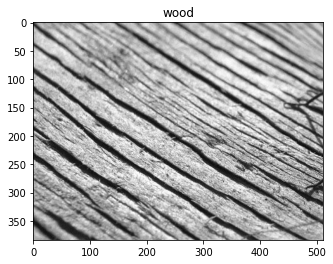

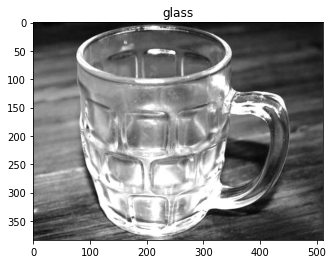

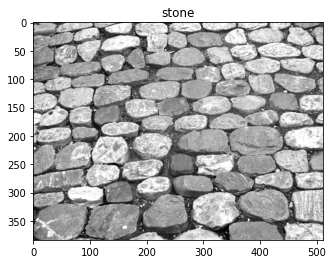

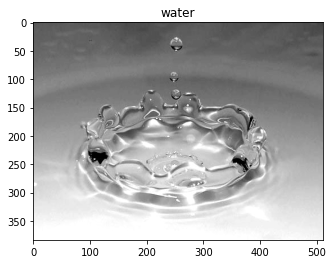

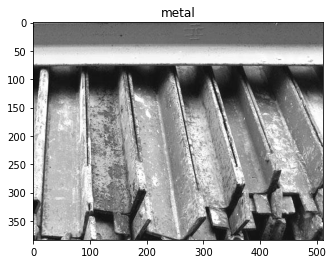

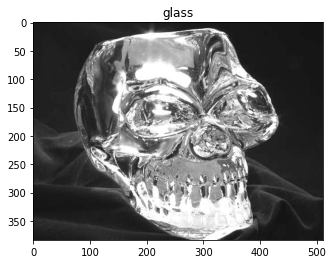

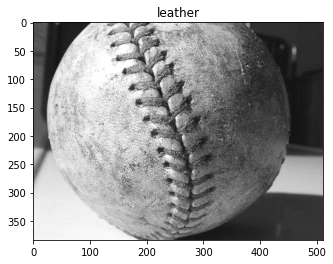

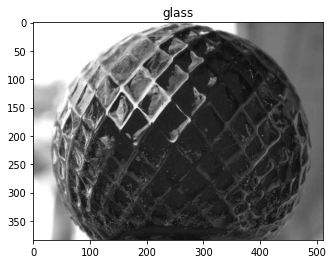

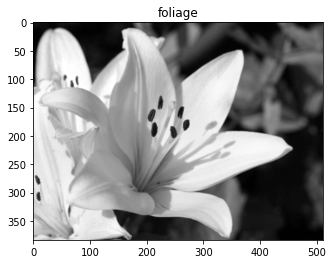

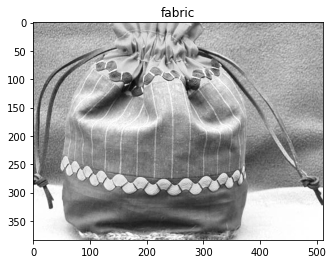

In [4]:
indices = []
for i in range(0,10):
    index = random.randint(0, len(images))
    indices.append(index)

for i in indices:
    plt.title(labels[i])
    plt.imshow(images[i], cmap='gray')
    plt.show()

# **Data augmentation**

In [5]:
augmentation = iaa.Sequential([
    # Flip
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),

])


In [6]:
augmented_images = augmentation(images=images)

images += augmented_images
labels += labels

print(len(augmented_images))

1000


# **Visualize augmented dataset**

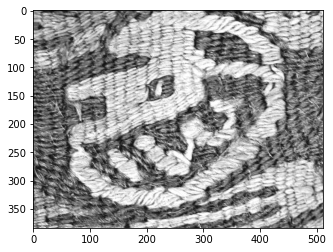

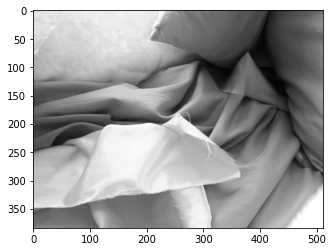

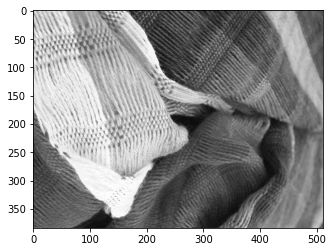

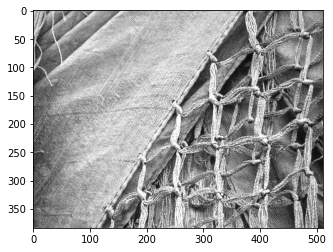

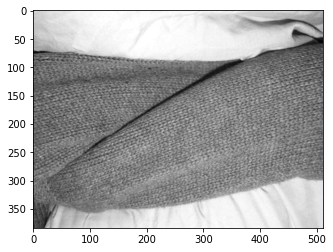

In [7]:
for img in augmented_images[:5]:
    plt.imshow(img, cmap='gray')
    plt.show()    

# **Discover new dataset shape**

In [8]:
images = np.array(images)
print("images shape:", images.shape)
print(len(labels))

images shape: (2000, 384, 512)
2000


# **Encode labels from text to integers**

In [9]:
images = np.array(images)
labels = np.array(labels)
label_encoder = preprocessing.LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [10]:
print(np.unique(labels))
print(np.unique(encoded_labels))

['fabric' 'foliage' 'glass' 'leather' 'metal' 'paper' 'plastic' 'stone'
 'water' 'wood']
[0 1 2 3 4 5 6 7 8 9]


# **Split dataset to train and test**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.3, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1400, 384, 512)
y_train shape: (1400,)
x_test shape: (600, 384, 512)
y_test shape: (600,)


# **GLCM Features Extraction**

In [12]:
def generate_glcm(data):
    glcm_features = []
    for img in data:
        glcm = graycomatrix(img, [0, 1, 2, 3], [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4])
        energy = graycoprops(glcm, 'energy')
        contrast = graycoprops(glcm, 'contrast')
        dissimilarity = graycoprops(glcm, 'dissimilarity')
        homogeneity = graycoprops(glcm, 'homogeneity')
        feature = np.array([energy, contrast, dissimilarity, homogeneity]).flatten()
        glcm_features.append(feature)
    return glcm_features

In [13]:
glcm_train = generate_glcm(x_train)
glcm_train = np.array(glcm_train)
print("glcm_train shape:", glcm_train.shape)

glcm_train shape: (1400, 64)


In [14]:
glcm_test = generate_glcm(x_test)
glcm_test = np.array(glcm_test)
print("glcm_test shape:", glcm_test.shape)

glcm_test shape: (600, 64)


# **KNN Classifier**

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(glcm_train, y_train)
predictions = knn.predict(glcm_test)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy Score =', accuracy * 100, '%')

Accuracy Score = 60.83333333333333 %
